# 2021_ML_class_TeamProject

# 패키지 import

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# MNIST dataset load & Discover the data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame
X_mnist, y_mnist = X_mnist.to_numpy(), y_mnist.to_numpy()
print(X_mnist.shape, X_mnist.dtype)
print(y_mnist.shape, y_mnist.dtype)

(70000, 784) float64
(70000,) object


In [4]:
y_mnist = y_mnist.astype(np.uint8)
print(y_mnist.dtype)

uint8


In [5]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = X_mnist[:60000], X_mnist[60000:], y_mnist[:60000], y_mnist[60000:]

In [6]:
len(X_mnist_train)

60000

# My data load & Morphology

In [7]:
import cv2 as cv
import glob

In [8]:
# file이 있는 path로 이동
os.chdir("C:/Users/HongShik/anaconda3/student_0-1-1/project")

In [9]:
# 현재 작업 경로 확인
path = os.getcwd()
print(path)

C:\Users\HongShik\anaconda3\student_0-1-1\project


In [10]:
# 저장을 위한 변수 목록
wSize = 34               # resize 후 한 instance 34*35
hSize = 34
width = 20; height = 20  # 첫번째 instance 20,20 에서 시작함

In [11]:
# numpy arr 관련 변수
number_of_data = 5000 # 데이터 수(= instance)
number_of_class = 10 # 0~9까지 10개
img_size = 28 # 이미지의 사이즈 (정사각형)

In [12]:
# 저장 공간용 빈 np arr를 덧셈의 형태로 만들기 
X_my = np.zeros((number_of_data,) + (img_size, img_size), dtype="uint8")
y_my = np.zeros((number_of_data,), dtype="object")

In [13]:
idx = 0

In [14]:
for file in glob.glob(path+'/data (*).jpg'):
    img = cv.imread(file, cv.IMREAD_GRAYSCALE)
    
    cimg = cv.resize(img, (380,380), interpolation=cv.INTER_AREA)
    
    kernel = np.ones((3,3), np.uint8)
    rimg = cv.erode(cimg, kernel, iterations = 1)
    # cv.imshow("badoc", rimg)
    
    for i in range(0, 10):
    # 가로로 쭉 읽은 후, 다음 줄 가는 방식
        for j in range(0, 10):
            # 내부에서 28*28 size로 개별 instance 추출
            simg = rimg[height+3:height+hSize-3, width+3:width+wSize-3]     # 28*28
            
            # 개별 img를 numpy arr로 변환
            nimg = np.array(simg, dtype=np.uint8) 
            X_my[idx, :, :] = nimg # i번째에 이미지 픽셀값 입력 
            # labeling
            y_my[idx] = str(j)
            
            # 가로 방향 다음 좌표 계산
            width = width+wSize
            # cv.imwrite("data"+str(idx)+".jpg", simg)
            # cv.imshow("first instance", simg)
            # cv.waitKey()
            idx += 1
        # 가로 방향 좌표 초기화
        width = 20
        # 세로 방향 다음 좌표 계산
        height += hSize
        # print(height, width)

    # 좌표 변수 초기화
    width = 20; height = 20  # 20,20 에서 시작

In [15]:
# 출력 설정
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [16]:
# inverse
X_my = ~X_my

In [17]:
# test image plot
print(X_my[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21  51  51  51   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1  51 207 207 207  72   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  73 205 207 207 207  72   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3 131 242 242 242 207 207  72   0   0   0   0   

In [18]:
# mnist와 동일한 dtype으로 바꾸기
X_my = X_my.astype(np.float64)
y_my = y_my.astype(np.uint8)

In [19]:
print(X_my.shape, X_my.dtype)
print(y_my.shape, y_my.dtype)

(5000, 28, 28) float64
(5000,) uint8


In [20]:
# 차원 축소(reshape)
X_my = X_my.reshape(-1, 784)

In [21]:
# print(X_my)

MNIST data와 myData 비교

In [22]:
print(X_my[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [23]:
print(X_mnist_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.   0.   0.   0.   0.

In [24]:
# labeling된 y_my 배열
y_my

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 

In [25]:
len(y_my)

5000

# img preprocessing

In [26]:
# numpy 벡터 연산을 통한 noise 제거
treshold = 30
X_my = np.where(X_my<treshold, 0, X_my)

In [27]:
# test img plt
# noise가 많이 제거됨
print(X_my[14])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 117. 117. 117.  81.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 108. 108. 108.  64.   0.   0.   0.   0. 152. 152. 152.  96.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 108. 204. 204. 204.   0.   0.   0.   0. 152. 152. 152. 131.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

# Prepare the data

# MyData를 train/test set 분할

In [28]:
# 분할 비율은 8:2
# 각 class별 개수를 맞춰, bias를 방지하기 위해 shuffle = False
from sklearn.model_selection import train_test_split
X_my_train, X_my_test, y_my_train, y_my_test = train_test_split(X_my, y_my, test_size=0.2, shuffle = False, random_state=42)

In [29]:
len(X_my_train), len(y_my_test)

(4000, 1000)

In [30]:
# shuffle 됐는지 확인
for i in range(10):
    print(y_my_train[i])

0
1
2
3
4
5
6
7
8
9


In [31]:
# shuffle = False

print(y_my_test)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9

In [32]:
# data와 label이 일치하는가?
# 일치
print(X_my_test[0])
print(y_my_test[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  42. 158. 175. 175. 175. 166.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  60. 206. 206. 206. 175. 187. 187.   0.   0.   0.   0.

In [33]:
len(X_my_train), len(y_my_train)

(4000, 4000)

In [34]:
for i in range(10):
    print(y_my_test[i])

0
1
2
3
4
5
6
7
8
9


In [35]:
# data와 label이 일치하는가?
# 일치
print(X_my_test[6])
print(y_my_test[6])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 126. 183. 183. 183. 179. 179. 122.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 151. 151. 183. 183. 183. 179. 179. 122.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  55. 204. 204. 204. 183. 183. 179. 179. 122.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 186. 204. 204. 204. 132.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 226. 226. 226. 204.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  88. 226. 226. 226.  69.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [36]:
print(X_my_train[1])
print(y_my_train[1])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  51.  51.  51.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  51. 207. 207. 207.  72.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

# MNIST와 myData concatenate

In [37]:
# 배열의 클래스 확인
print(type(X_mnist_train))
print(type(X_my_test))
print(type(y_mnist_train))
print(type(y_my_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
# np.concatenate 이용하여 수직 방향으로 병합
# X_train
X_train = np.concatenate([X_mnist_train, X_my_train])
print(X_train.shape)

(64000, 784)


In [39]:
# y_train
y_train = np.concatenate([y_mnist_train, y_my_train])
print(y_train.shape)

(64000,)


In [40]:
# X_test
X_test = np.concatenate([X_mnist_test, X_my_test])
print(X_test.shape)

(11000, 784)


In [41]:
# y_test
y_test = np.concatenate([y_mnist_test, y_my_test])
print(y_test.shape)

(11000,)


In [42]:
# train 확인
print(X_train[60003], y_train[60003])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [43]:
# test 확인
print(X_test[-1], y_test[-1])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 124. 197. 197. 197.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  48.  58.  58.  58.  31.   0. 220. 220. 220. 211.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 114. 192. 192. 192. 130. 115.  72.  62. 222. 222. 222. 211.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 134. 153. 192. 192. 192. 130. 115.  72. 171. 222. 222. 222. 213.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  67. 198. 198. 198. 192. 192. 130. 115.  72. 205. 222. 230. 230. 230.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [44]:
# suffle된 상태로 train/test 분할

X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [46]:
# 다시 병합
X_train = np.concatenate([X_train1, X_train2])
X_test = np.concatenate([X_test1, X_test2])

In [47]:
y_train = np.concatenate([y_train1, y_train2])
y_test = np.concatenate([y_test1, y_test2])

In [48]:
print(X_train.shape, X_test.shape)

(64000, 784) (11000, 784)


In [49]:
print(y_train.shape, y_test.shape)

(64000,) (11000,)


In [50]:
print(X_train[89])
print(y_train[89])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 141. 254. 254. 254. 254. 255. 123.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   8.   0.  11. 247. 253. 253. 253. 253. 253. 215.  34.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  84. 107. 135. 172. 107. 197. 253. 253. 253. 253. 253. 253. 253. 220.  45.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [51]:
print(X_test[97], y_test[97])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  29. 114. 226. 255. 255. 170.  29.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [52]:
# suffle하기 위한 분할

X_my_train1, X_my_train2, y_my_train1, y_my_train2 = train_test_split(X_my_train, y_my_train, test_size=0.2, random_state=42)

In [53]:
X_my_test1, X_my_test2, y_my_test1, y_my_test2 = train_test_split(X_my_test, y_my_test, test_size=0.2, random_state=42)

In [54]:
# 다시 병합
X_my_train = np.concatenate([X_my_train1, X_my_train2])
X_my_test = np.concatenate([X_my_test1, X_my_test2])

In [55]:
y_my_train = np.concatenate([y_my_train1, y_my_train2])
y_my_test = np.concatenate([y_my_test1, y_my_test2])

In [56]:
print(X_my_train.shape, X_my_test.shape)

(4000, 784) (1000, 784)


In [57]:
print(y_my_train.shape, y_my_test.shape)

(4000,) (1000,)


# Baseline

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_clf = RandomForestClassifier(random_state=42)

In [60]:
from sklearn.metrics import accuracy_score

rf_clf.fit(X_mnist_train, y_mnist_train)
y_base_pred = rf_clf.predict(X_my_test)

In [61]:
# baseline score
print("baseline score:", rf_clf.__class__.__name__, accuracy_score(y_my_test, y_base_pred))

baseline score: RandomForestClassifier 0.33


# Modeling

In [62]:
import time

In [63]:
def hms(s):
    hours = s // 3600
    s = s - hours*3600
    mu = s // 60
    ss = s - mu*60
    return hours, mu, ss

In [64]:
# Import classifiers

from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier # Neural network!
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [65]:
# generation classifier

# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
mlp_clf = MLPClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
et_clf = ExtraTreesClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability= True)
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
xgb_clf = XGBClassifier(random_state=42) 

In [66]:
# Training  classifiers and prediction
from sklearn.metrics import accuracy_score

estimators = [mlp_clf, rf_clf, et_clf, svm_clf, knn_clf, xgb_clf]
for estimator in estimators:
    start = time.time()
    estimator.fit(X_train, y_train)
    end = time.time()
    inf_start = time.time()
    y_pred = estimator.predict(X_test)
    inf_end = time.time()
    
    # Print scores
    print(estimator.__class__.__name__, accuracy_score(y_test, y_pred))
    
    # training time
    t = round(end - start)
    hours, mu, ss = hms(t)
    print('training time: ', hours, 'h', mu, 'm', ss, 's')
    
    # inference time
    inf_t = round(inf_end-inf_start)
    hours, mu, ss = hms(inf_t)

    print('inference time: ', hours, 'h', mu, 'm', ss, 's')

MLPClassifier 0.9323636363636364
training time:  0 h 1 m 33 s
inference time:  0 h 0 m 0 s
RandomForestClassifier 0.9579090909090909
training time:  0 h 0 m 47 s
inference time:  0 h 0 m 0 s
ExtraTreesClassifier 0.9601818181818181
training time:  0 h 0 m 55 s
inference time:  0 h 0 m 0 s
SVC 0.9656363636363636
training time:  0 h 34 m 27 s
inference time:  0 h 1 m 31 s
KNeighborsClassifier 0.9581818181818181
training time:  0 h 0 m 0 s
inference time:  0 h 0 m 20 s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9660909090909091
training time:  0 h 4 m 18 s
inference time:  0 h 0 m 0 s


In [67]:
# Define named_estimators for ensemble learning
named_estimators = [
    ('mlp', mlp_clf), ('rf', rf_clf), ('et', et_clf), ('svm', svm_clf), ('knn', knn_clf)
]

In [68]:
# Define voting_clf
from sklearn.ensemble import VotingClassifier

# hard voting을 이용
voting_clf = VotingClassifier(named_estimators, voting='hard')

In [69]:
# VotingClassifier 학습/예측/평가. 
start = time.time()
voting_clf.fit(X_train , y_train) 
end = time.time()
inf_start = time.time()
pred = voting_clf.predict(X_test) 
inf_end = time.time()

# Print score
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

# training time
t = round(end - start)
hours, mu, ss = hms(t)
print('training time: ', hours, 'h', mu, 'm', ss, 's')

# inference time
inf_t = round(inf_end-inf_start)
hours, mu, ss = hms(inf_t)

print('inference time: ', hours, 'h', mu, 'm', ss, 's')

VotingClassifier 0.9660909090909091
training time:  0 h 37 m 35 s
inference time:  0 h 1 m 53 s


# Model selection: XGBClassifier

#### 모델 선정 당시 가장 높은 정확도와, 파라미터 튜닝이 용이해보여 선택

In [71]:
# xgb 단일 모델
# Import classifiers

from xgboost import XGBClassifier

In [72]:
# generation classifier

epoch_acc = []

xgb_clf = XGBClassifier(
    random_state=42, 
    n_estimators=10000, 
    learning_rate = 0.2, 
    max_depth = 5, 
    min_child_weight=3,
    max_delta_step=1
)

In [73]:
evals = [(X_train, y_train), (X_test,y_test)]

In [74]:
start = time.time()
# fit & early stop
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "mlogloss", eval_set = evals, verbose = 1)
end = time.time()
results = xgb_clf.evals_result()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:2.09234	validation_1-mlogloss:2.09670
[1]	validation_0-mlogloss:1.89246	validation_1-mlogloss:1.90180
[2]	validation_0-mlogloss:1.70441	validation_1-mlogloss:1.71841
[3]	validation_0-mlogloss:1.52986	validation_1-mlogloss:1.54712
[4]	validation_0-mlogloss:1.36704	validation_1-mlogloss:1.38926
[5]	validation_0-mlogloss:1.22026	validation_1-mlogloss:1.24599
[6]	validation_0-mlogloss:1.08434	validation_1-mlogloss:1.11412
[7]	validation_0-mlogloss:0.96690	validation_1-mlogloss:1.00001
[8]	validation_0-mlogloss:0.86688	validation_1-mlogloss:0.90378
[9]	validation_0-mlogloss:0.78385	validation_1-mlogloss:0.82448
[10]	validation_0-mlogloss:0.71260	validation_1-mlogloss:0.75602
[11]	validation_0-mlogloss:0.65311	validation_1-mlogloss:0.69860
[12]	validation_0-mlogloss:0.60010	validation_1-mlogloss:0.64696
[13]	validation_0-mlogloss:0.55418	validation_1-mlogloss:0.60334
[14]	validation_0-mlogloss:0.51523	validation_1-mlogloss:0.56610
[15]	validation_0-mlogloss:0.48100	

[126]	validation_0-mlogloss:0.04299	validation_1-mlogloss:0.13652
[127]	validation_0-mlogloss:0.04228	validation_1-mlogloss:0.13584
[128]	validation_0-mlogloss:0.04167	validation_1-mlogloss:0.13523
[129]	validation_0-mlogloss:0.04109	validation_1-mlogloss:0.13476
[130]	validation_0-mlogloss:0.04061	validation_1-mlogloss:0.13430
[131]	validation_0-mlogloss:0.03993	validation_1-mlogloss:0.13369
[132]	validation_0-mlogloss:0.03939	validation_1-mlogloss:0.13318
[133]	validation_0-mlogloss:0.03868	validation_1-mlogloss:0.13265
[134]	validation_0-mlogloss:0.03822	validation_1-mlogloss:0.13235
[135]	validation_0-mlogloss:0.03768	validation_1-mlogloss:0.13171
[136]	validation_0-mlogloss:0.03720	validation_1-mlogloss:0.13118
[137]	validation_0-mlogloss:0.03672	validation_1-mlogloss:0.13085
[138]	validation_0-mlogloss:0.03608	validation_1-mlogloss:0.13028
[139]	validation_0-mlogloss:0.03569	validation_1-mlogloss:0.12983
[140]	validation_0-mlogloss:0.03514	validation_1-mlogloss:0.12923
[141]	vali

[251]	validation_0-mlogloss:0.00835	validation_1-mlogloss:0.10433
[252]	validation_0-mlogloss:0.00826	validation_1-mlogloss:0.10418
[253]	validation_0-mlogloss:0.00817	validation_1-mlogloss:0.10400
[254]	validation_0-mlogloss:0.00811	validation_1-mlogloss:0.10390
[255]	validation_0-mlogloss:0.00803	validation_1-mlogloss:0.10388
[256]	validation_0-mlogloss:0.00795	validation_1-mlogloss:0.10383
[257]	validation_0-mlogloss:0.00787	validation_1-mlogloss:0.10365
[258]	validation_0-mlogloss:0.00779	validation_1-mlogloss:0.10362
[259]	validation_0-mlogloss:0.00771	validation_1-mlogloss:0.10365
[260]	validation_0-mlogloss:0.00763	validation_1-mlogloss:0.10347
[261]	validation_0-mlogloss:0.00755	validation_1-mlogloss:0.10328
[262]	validation_0-mlogloss:0.00749	validation_1-mlogloss:0.10322
[263]	validation_0-mlogloss:0.00742	validation_1-mlogloss:0.10314
[264]	validation_0-mlogloss:0.00737	validation_1-mlogloss:0.10306
[265]	validation_0-mlogloss:0.00728	validation_1-mlogloss:0.10301
[266]	vali

[376]	validation_0-mlogloss:0.00304	validation_1-mlogloss:0.09827
[377]	validation_0-mlogloss:0.00302	validation_1-mlogloss:0.09822
[378]	validation_0-mlogloss:0.00300	validation_1-mlogloss:0.09819
[379]	validation_0-mlogloss:0.00298	validation_1-mlogloss:0.09820
[380]	validation_0-mlogloss:0.00296	validation_1-mlogloss:0.09810
[381]	validation_0-mlogloss:0.00294	validation_1-mlogloss:0.09806
[382]	validation_0-mlogloss:0.00293	validation_1-mlogloss:0.09804
[383]	validation_0-mlogloss:0.00292	validation_1-mlogloss:0.09809
[384]	validation_0-mlogloss:0.00290	validation_1-mlogloss:0.09820
[385]	validation_0-mlogloss:0.00288	validation_1-mlogloss:0.09817
[386]	validation_0-mlogloss:0.00286	validation_1-mlogloss:0.09816
[387]	validation_0-mlogloss:0.00285	validation_1-mlogloss:0.09808
[388]	validation_0-mlogloss:0.00282	validation_1-mlogloss:0.09804
[389]	validation_0-mlogloss:0.00281	validation_1-mlogloss:0.09804
[390]	validation_0-mlogloss:0.00279	validation_1-mlogloss:0.09798
[391]	vali

[501]	validation_0-mlogloss:0.00167	validation_1-mlogloss:0.09658
[502]	validation_0-mlogloss:0.00166	validation_1-mlogloss:0.09657
[503]	validation_0-mlogloss:0.00166	validation_1-mlogloss:0.09654
[504]	validation_0-mlogloss:0.00165	validation_1-mlogloss:0.09661
[505]	validation_0-mlogloss:0.00164	validation_1-mlogloss:0.09663
[506]	validation_0-mlogloss:0.00164	validation_1-mlogloss:0.09662
[507]	validation_0-mlogloss:0.00163	validation_1-mlogloss:0.09657
[508]	validation_0-mlogloss:0.00162	validation_1-mlogloss:0.09660
[509]	validation_0-mlogloss:0.00162	validation_1-mlogloss:0.09659
[510]	validation_0-mlogloss:0.00161	validation_1-mlogloss:0.09663
[511]	validation_0-mlogloss:0.00161	validation_1-mlogloss:0.09664
[512]	validation_0-mlogloss:0.00160	validation_1-mlogloss:0.09665
[513]	validation_0-mlogloss:0.00159	validation_1-mlogloss:0.09668
[514]	validation_0-mlogloss:0.00159	validation_1-mlogloss:0.09669
[515]	validation_0-mlogloss:0.00158	validation_1-mlogloss:0.09668
[516]	vali

In [75]:
# training time
t = round(end - start)
hours, mu, ss = hms(t)

print('training time: ', hours, 'h', mu, 'm', ss, 's')

training time:  0 h 20 m 35 s


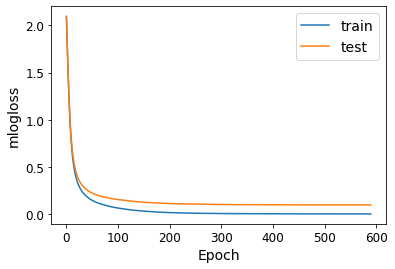

In [76]:
# learning curve

plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')

plt.xlabel("Epoch", fontsize=14) 
plt.ylabel("mlogloss", fontsize=14)    
plt.legend(loc="upper right", fontsize=14)
plt.show()  

# Cross-validation

In [77]:
#전체 데이터셋의 Cross-validation 값을 4로 설정
from sklearn.model_selection import cross_val_score

print(cross_val_score(xgb_clf, X_train, y_train, cv=4, scoring="accuracy"))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.9675625 0.9665625 0.96525   0.96425  ]


# Test set 성능 평가

In [78]:
inf_start = time.time()
y_pred = xgb_clf.predict(X_test)
inf_end = time.time()

In [79]:
from sklearn.metrics import accuracy_score

print(xgb_clf.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.9696363636363636


In [80]:
# inference time
inf_t = round(inf_end-inf_start)
hours, mu, ss = hms(inf_t)

print('inference time: ', hours, 'h', mu, 'm', ss, 's')

inference time:  0 h 0 m 0 s


In [81]:
y_my_pred = xgb_clf.predict(X_my_test)

In [82]:
print(xgb_clf.__class__.__name__, accuracy_score(y_my_test, y_my_pred))

XGBClassifier 0.854


# Confusion matrix

In [83]:
import pandas as pd

ct = pd.crosstab(y_pred, y_test)

print(ct)

col_0     0     1     2     3     4    5     6     7     8     9
row_0                                                           
0      1059     0     5     0     0    3    10     0     7     2
1         2  1216     0     2     0    0     4     5     0     5
2         1     4  1092     5     5    1     2    15     3     2
3         2     3     6  1072     0   11     0     6     1     8
4         0     0     6     0  1035    1     4     1     5     8
5         3     0     1    11     0  963     2     1     2     1
6         2     8     4     3     8    3  1028     1     3     1
7         2     3    11     9     2    3     0  1086     3     6
8         8     1     5     6     8    3     7     1  1044     5
9         1     0     2     2    24    4     1    12     6  1071


In [84]:
# score of estimator
# acc_score와 동일?
print(xgb_clf.__class__.__name__, xgb_clf.score(X_test, y_test))

XGBClassifier 0.9696363636363636


In [85]:
ct2 = pd.crosstab(y_my_pred, y_my_test)

print(ct2)

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      87   0   2   0   0   1   3   0   2   0
1       2  87   0   2   0   0   2   3   0   0
2       1   3  84   2   1   0   2   1   0   0
3       2   1   2  82   0   5   0   3   0   2
4       0   0   3   0  74   1   1   0   2   0
5       3   0   1   5   0  86   0   1   0   1
6       0   6   3   3   3   0  88   1   3   1
7       1   3   4   3   2   2   0  83   1   1
8       4   0   0   3   6   2   3   0  90   2
9       0   0   1   0  14   3   1   8   2  93


In [86]:
print(xgb_clf.__class__.__name__, xgb_clf.score(X_my_test, y_my_test))

XGBClassifier 0.854


# Model save

In [87]:
import joblib

In [88]:
# joblib.dump(xgb_clf, 'C:/ML2021_new_data/save/1204_970.pkl')

# Data save

In [89]:
save_path = 'C:/Users/HongShik/anaconda3/student_0-1-1/project/save'

In [90]:
# train
np.save(save_path+'/X_train.npy', X_train)

In [91]:
np.save(save_path+'/y_train.npy', y_train)

In [92]:
np.save(save_path+'/X_my_train.npy', X_my_train)

In [93]:
np.save(save_path+'/y_my_train.npy', y_my_train)

In [94]:
# test
np.save(save_path+'/X_test.npy', X_test)

In [95]:
np.save(save_path+'/y_test.npy', y_test)

In [96]:
np.save(save_path+'/X_my_test.npy', X_my_test)

In [97]:
np.save(save_path+'/y_my_test.npy', y_my_test)

# Hyperparameter tuning

# XGB 튜닝

In [ ]:
# 시간이 매우 오래 걸리는 관계로, 따로 사진으로 첨부

In [ ]:
"""from sklearn.model_selection import GridSearchCV"""

In [ ]:
"""xgb_param_grid = {'max_depth':[3,5,6], 
                  'min_child_weight':[3,5,6], 
                  'gamma':[0, 0.001, 0.01, 0.0001], 
                  'learning_rate':[0.1,0.05,0.01]}"""

In [ ]:
"""gsXgb = GridSearchCV(xgb_clf, param_grid = xgb_param_grid, cv=3, scoring="accuracy", 
                     verbose=1)"""

In [ ]:
"""gsXgb.fit(X_train, y_train)"""

In [ ]:
"""xgb_best = gsXgb.best_estimator_"""

In [ ]:
"""gsXgb.best_score_"""